# Import Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

# Importing the dataset

Link: https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Clustering%20Customer_segmentaion/Mall_Customers.csv

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Clustering%20Customer_segmentaion/Mall_Customers.csv')

# Data Anlaysis

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [51]:
df.shape

# If we have low amount of datapoints,
# how can we enlarge the present datapoints to train our model

(200, 5)

In [52]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* Conclusions

1. No Null Value
2. Gender has the dtype of object, which needs to be taken care of

In [54]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Conclusions

1. Avg. age of Customer is 38
2. Customer that visits the mall is having the age b/w 18 to 70
3. Having the Avg. annual income as $60k

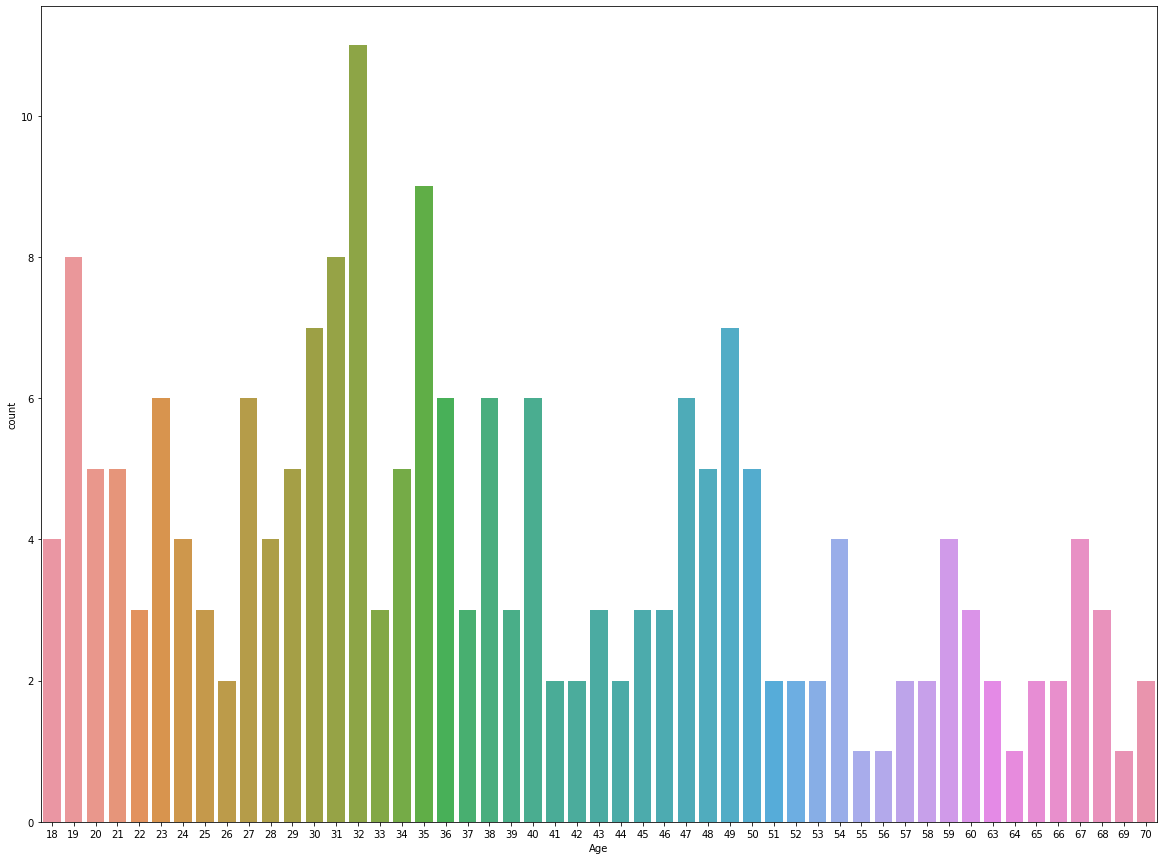

In [55]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age')

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


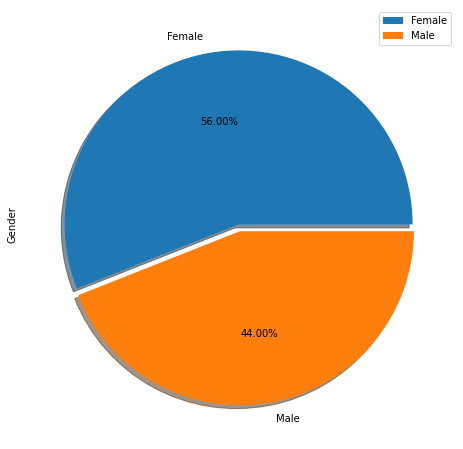

In [57]:
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                              explode=(0,0.04))
plt.legend()

* Conclusion

1. No. of females > No. of males
2. Females are 12% more than Male
3. Female visits the mall most of the time.

In [58]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Anuual Income')

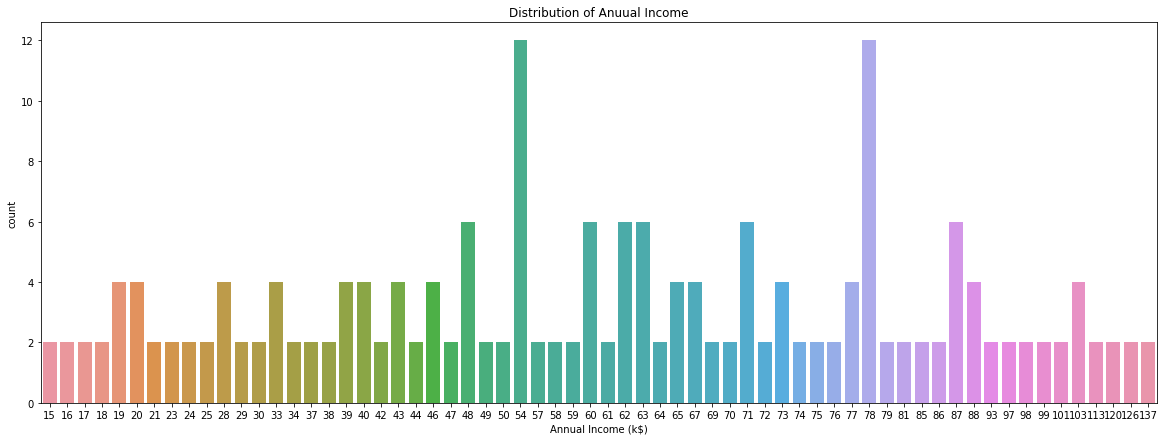

In [59]:
# Distribution of Income
plt.figure(figsize=(20,7))
sns.countplot(df['Annual Income (k$)'], data=df)
plt.title('Distribution of Anuual Income')

* Conclusions

1. The customers that are having the salary of $54(k) and $78(K), visits the mall most of time

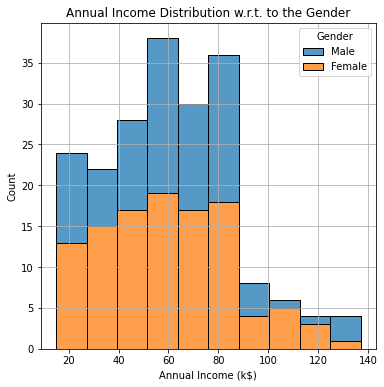

In [60]:
# Show the Annual Income Distribution w.r.t. to the Gender

plt.figure(figsize=(6,6))
sns.histplot(df,x='Annual Income (k$)',hue='Gender', multiple='stack')
plt.title('Annual Income Distribution w.r.t. to the Gender')
plt.grid()

* Conclusion

# Seaborn lmplot

In [61]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


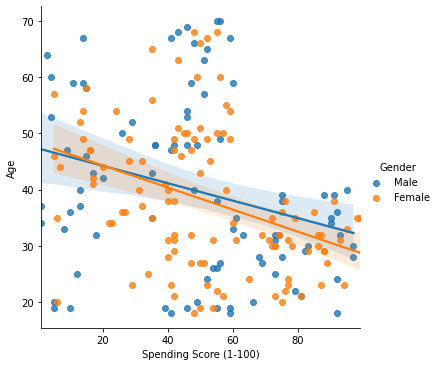

In [62]:
sns.lmplot(data=df,x='Spending Score (1-100)', y='Age', hue='Gender')

# Machine Learning

In [63]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [65]:
enc = LabelEncoder()

In [66]:
df.Gender = enc.fit_transform(df.Gender)

In [67]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [68]:
df.drop('CustomerID', axis=1, inplace=True)

In [69]:
ssd = []
for i in range(1,11):
  Kmodel = KMeans(n_clusters=i, n_init=15,max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

In [70]:
ssd

[308862.06000000006,
 212889.44245524297,
 143391.59236035682,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51165.18423710792,
 44357.326649026654,
 40840.09165584415,
 37489.163473423134]

Text(0.5, 1.0, 'Elbow plot')

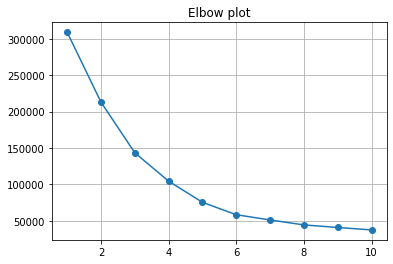

In [71]:
plt.plot(range(1,11), ssd, marker='o')
plt.grid()
plt.title('Elbow plot')

In [72]:
# k=6

In [73]:
Kmodel = KMeans(n_clusters=6)

In [74]:
Kmodel.fit(df)
# Kmodel.fit_predict(df)
# Kmodel.predict(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
prediction = Kmodel.predict(df)

In [76]:
prediction

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 3, 0, 4,
       5, 3, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [77]:
len(prediction)

200

In [78]:
Kmodel.cluster_centers_

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [79]:
len(Kmodel.cluster_centers_)

6

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [81]:
df['Cluster'] = prediction

In [82]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5


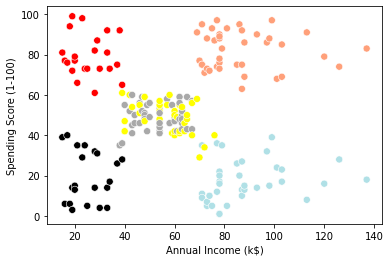

In [83]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'],
                y = df['Spending Score (1-100)'],
                c=color[Kmodel.labels_],
                s=50)

In [85]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [86]:
var = linkage(df, method='ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

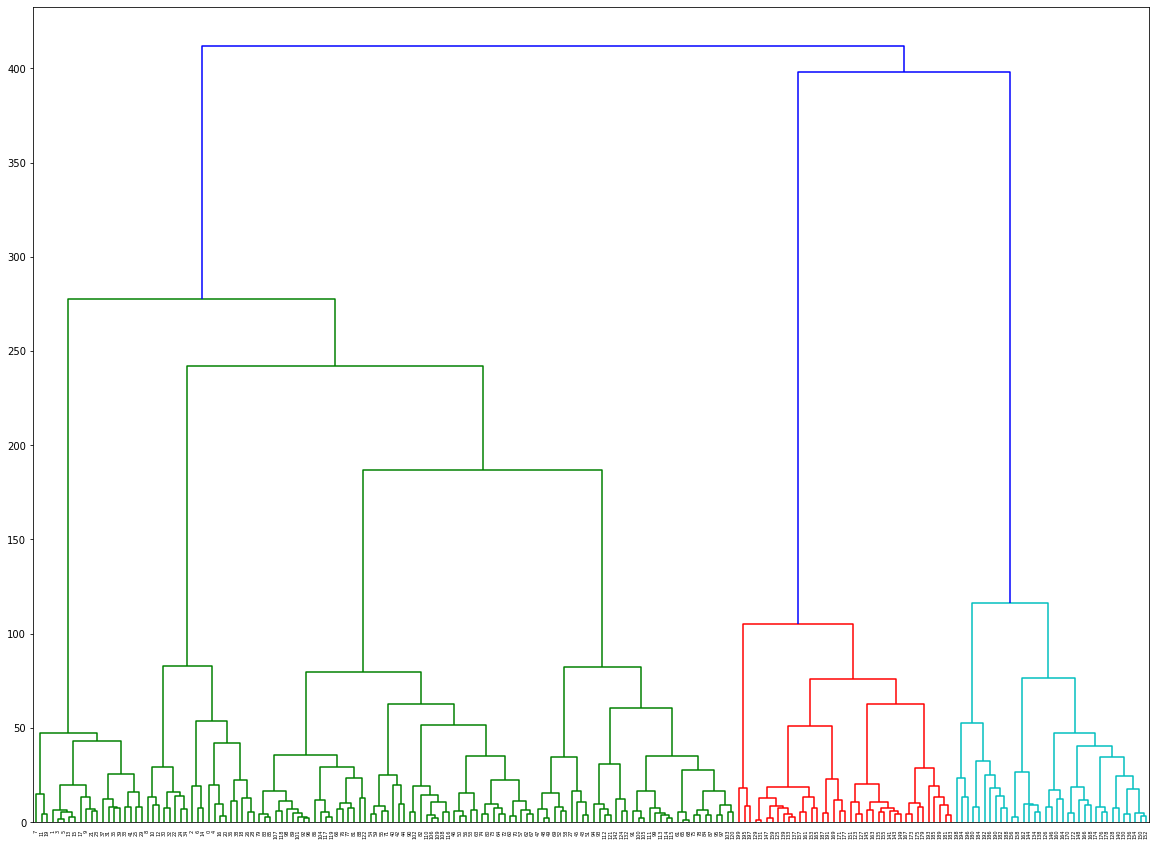

In [87]:
plt.figure(figsize=(20,15))
dendrogram(var, leaf_rotation=90)

In [88]:
# DBSCAN